In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
import platform
from matplotlib import font_manager, rc
font = 'Arial'
plt.rcParams['font.family'] = font
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
# Reading the input data
data= pd.read_csv('total_data.csv')

In [6]:
start_year=2009
end_year=2018
TT_year=2016

In [7]:
data=data[(data['Year']>=start_year) & (data['Year']<=end_year)]
data.index=range(len(data))

In [8]:
data

,level_0,Time,Year,Week,Month,Rate,Average temperature,Minimum temperature,Maximum temperature,Rainfall,...,Number of Daycare center,Population of Daycare center,outbreak,warning,peak,warning3,warning2,season,Last norovirus detection late,th
0,24,213,2009,1,1,0.254237,-2.836937,-8.133784,3.728829,0.070614,...,35550,1175049,1,1,0,1,1,3.0,0.264706,0.1
1,25,214,2009,2,1,0.242718,-1.442446,-6.129679,4.415236,0.063534,...,35550,1175049,1,1,0,1,1,3.0,0.254237,0.1
2,26,215,2009,3,1,0.209091,-3.629965,-8.651128,1.834398,0.220865,...,35550,1175049,1,1,0,1,1,3.0,0.242718,0.1
3,27,216,2009,4,1,0.203125,0.010902,-4.788534,5.876504,0.796053,...,35550,1175049,1,1,0,1,1,3.0,0.209091,0.1
4,28,217,2009,5,1,0.134752,0.651298,-4.672556,6.612406,0.759211,...,35550,1175049,1,1,0,1,1,3.0,0.203125,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,19,738,2018,49,12,0.058824,4.359091,0.242857,8.800974,3.480844,...,39171,1415742,0,1,0,0,0,13.0,0.174603,0.1
526,20,739,2018,50,12,0.175439,-1.687662,-6.483279,3.757305,0.297078,...,39171,1415742,1,1,0,1,1,13.0,0.058824,0.1
527,21,740,2018,51,12,0.258065,3.774838,-1.359740,9.749026,0.129383,...,39171,1415742,1,1,0,1,1,13.0,0.175439,0.1
528,22,741,2018,52,12,0.189189,-1.307630,-5.658279,3.435390,0.226136,...,39171,1415742,1,1,0,1,1,13.0,0.258065,0.1


In [9]:
# data preprocessing
for i in data.columns[2:data.shape[1]+1]:
    data[i]=data[i].astype('float')

In [11]:
variables=['Week','Average temperature',
       'Minimum temperature', 'Maximum temperature', 'Rainfall',
       'Minimum humidity', 'Relative humidity', 'Day length',
       'Duration of sunshine', 'Soil temperature at 3m',
       'Soil temperature at 5m', 'Number of Daycare center',
       'Population of Daycare center','Last norovirus detection late']
targets=['warning']

In [12]:
# train set
data_train=data[data['Year']<=TT_year]
data_train.index=range(len(data_train))

In [13]:
# test set
data_test=data[data['Year']>TT_year]
data_test.index=range(len(data_test))

In [14]:
data_train_X=data_train[variables]
data_train_Y=data_train[targets]

In [15]:
data_test_X=data_test[variables]
data_test_Y=data_test[targets]

In [16]:
# normalizing or scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_train_X = scaler.fit_transform(data_train_X)
data_test_X = scaler.fit_transform(data_test_X)

data_train_X = pd.DataFrame(data_train_X)
data_test_X = pd.DataFrame(data_test_X)

data_train_X.columns = variables
data_test_X.columns = variables

Automatically created module for IPython interactive environment


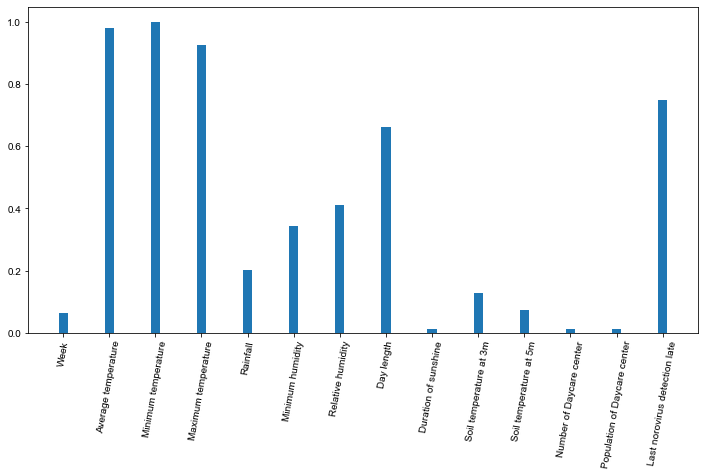

In [17]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression


X_train, X_test, y_train, y_test = train_test_split(
        data_train_X, data_train_Y, random_state=0)

plt.figure(figsize=(12,6))
plt.clf()

X_indices = data_train_X.columns


# Univariate feature selection with F-test for feature scoring
selector = SelectKBest(f_regression, k=13)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')


plt.xticks(rotation=80)

plt.show()

In [18]:
univalue_classification=pd.DataFrame()

In [19]:
univalue_classification['Features']=X_indices
univalue_classification['Fvalue']=selector.scores_
univalue_classification['Scores']=scores
univalue_classification['Pvalues']=selector.pvalues_
univalue_classification[' ']=['Week','Average temperature',
       'Minimum temperature', 'Maximum temperature', 'Rainfall',
       'Minimum humidity', 'Relative humidity', 'Day length',
       'Duration of sunshine', 'Soil temperature at 3m',
       'Soil temperature at 5m', 'Number of Daycare center',
       'Population of Daycare center','Last norovirus detection late']

In [20]:
univalue_classification

,Features,Fvalue,Scores,Pvalues,
0,Week,17.138160,0.062295,4.463633e-05,Week
1,Average temperature,526.710675,0.981672,2.794778e-69,Average temperature
2,Minimum temperature,542.547294,1.000000,1.467020e-70,Minimum temperature
3,Maximum temperature,480.326696,0.925933,2.181594e-65,Maximum temperature
4,Rainfall,66.143960,0.200691,9.660885e-15,Rainfall
5,Minimum humidity,125.652618,0.344403,8.894657e-25,Minimum humidity
6,Relative humidity,156.166551,0.410507,2.151791e-29,Relative humidity
7,Day length,293.518076,0.662552,5.390741e-47,Day length
8,Duration of sunshine,2.467486,0.013331,1.172244e-01,Duration of sunshine
9,Soil temperature at 3m,39.636362,0.128742,1.022148e-09,Soil temperature at 3m


In [21]:
univalue_classification.to_csv('feature_selection_result.csv')

In [22]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


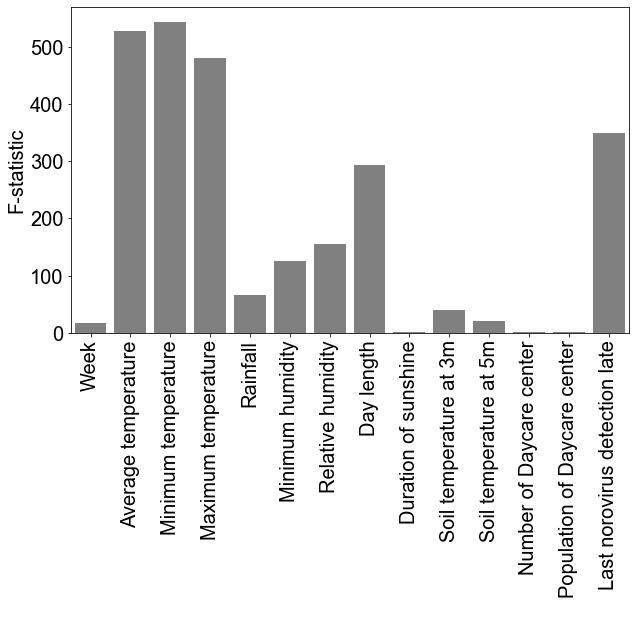

In [25]:
num=1
num_j=1;

plt.figure(figsize=(10,6))
# plt.figure(figsize=(10,8))
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=20) # figure title 폰트 크기
sns.barplot(data=univalue_classification,color = 'gray',x=" ",y='Fvalue')
plt.ylabel('F-statistic')
plt.legend().remove()
plt.xticks(rotation=90)

# plt.savefig('fig3.tiff', dpi=300)
plt.savefig('Fig3_a.tiff',dpi=300,facecolor='white',bbox_inches='tight')
plt.show()


In [26]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False

In [27]:
variables=['Week','Average temperature', 'Minimum temperature', 'Maximum temperature',
       'Rainfall', 'Minimum humidity', 'Relative humidity', 'Day length',
       'Soil temperature at 3m',
       'Soil temperature at 5m','Last norovirus detection late']

In [28]:
data_train_X=data_train_X[variables]
data_test_X=data_test_X[variables]
datacorr=pd.concat([data_train_X,data_train_Y],axis=1)

In [29]:
font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}

In [30]:
matplotlib.rcParams.update({'font.size': 15})

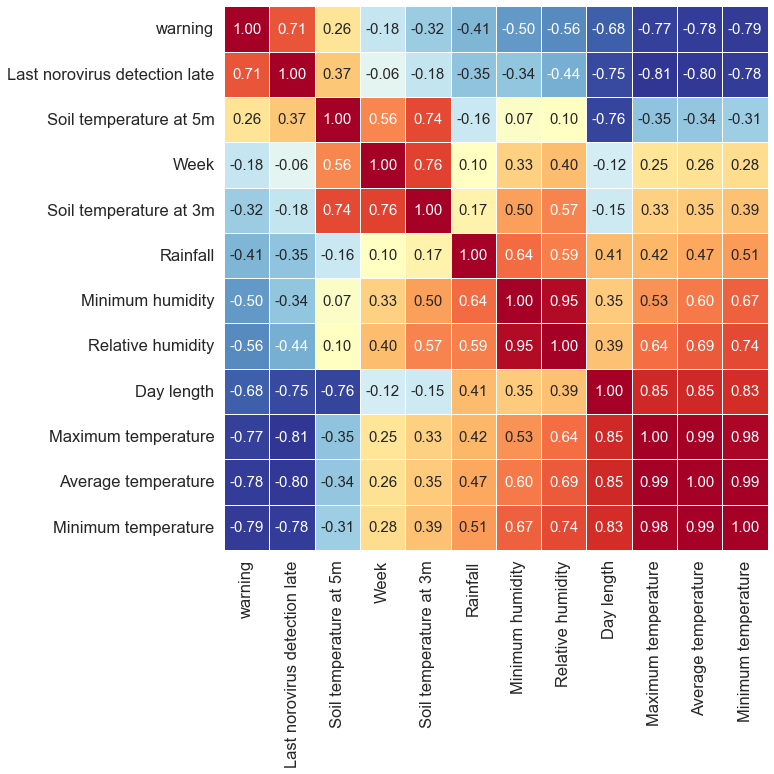

In [32]:
plt.figure(figsize=(10,10))
# plt.figure(figsize=(15,7))
plt.rc('font', size=20)        
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)
font2 = {'family': 'Arial','color':'k','weight': 'bold','size': 30}
k = 12 #number of variables for heatmap
corrmat = datacorr.corr()
cols = corrmat.nlargest(k, 'warning')['warning'].index
cm = np.corrcoef(datacorr[cols].values.T)
sns.set(font_scale=1.5)
        # ax = sns.heatmap(cm, cmap = 'RdYlBu_r', annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values,linewidths=.5)
ax = sns.heatmap(cm, cmap = 'RdYlBu_r',cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values,linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom, top)
# plt.rc('axes', titlesize=15)
# plt.title('CMML')
# plt.text(-6.5, -1, 'A', fontdict=font2)
plt.savefig('Fig3_b.tiff',dpi=300,facecolor=None,bbox_inches='tight')
